In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [33]:
dataset_train = pd.read_csv('IBM_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

#Data Preprocessing

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [35]:
X_train =[]
y_train =[]
for i in range(60,1428):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [40]:
regressor = Sequential()

In [41]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))

In [42]:
regressor.add(Dropout(0.2))

In [43]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [44]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [45]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [46]:
regressor.add(Dense(units=1))

In [47]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [48]:
regressor.fit(X_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
1368/1368 [==============================] - 10s 7ms/step - loss: 0.0409
Epoch 2/100
1368/1368 [==============================] - 6s 4ms/step - loss: 0.0079
Epoch 3/100
1368/1368 [==============================] - 6s 4ms/step - loss: 0.0074
Epoch 4/100
1368/1368 [==============================] - 6s 4ms/step - loss: 0.0064
Epoch 5/100
1368/1368 [==============================] - 6s 4ms/step - loss: 0.0064
Epoch 6/100
1368/1368 [==============================] - 5s 4ms/step - loss: 0.0063
Epoch 7/100
1368/1368 [==============================] - 6s 4ms/step - loss: 0.0061
Epoch 8/100
1368/1368 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 9/100
1368/1368 [==============================] - 7s 5ms/step - loss: 0.0049
Epoch 10/100
1368/1368 [==============================] - 7s 5ms/step - loss: 0.0053
Epoch 11/100
1368/1368 [==============================] - 7s 5ms/step - loss: 0.0047
Epoch 12/100
1368/1368 [==============================] - 7s 5ms/step - l

In [50]:
dataset_test = pd.read_csv('IBM_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [51]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test=[]
for i in range(60,80):
        X_test.append(inputs[i-60:i,0])

In [53]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

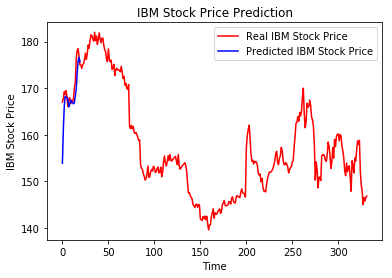

In [54]:
plt.plot(real_stock_price, color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_stock_price,color = 'blue', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()